In [ ]:
!pip install numpy==1.22.3
!pip install node2vec==0.4.4
!pip install Gensim
!pip install hazm
!pip install farsi-tools


  Using cached numpy-1.22.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hazm 0.9.3 requires numpy<2.0.0,>=1.24.3, but you have numpy 1.22.3 which is incompatible.


  Using cached numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import unicode_literals
import re
import regex
from farsi_tools import *
from hazm import *
import networkx as nx

In [ ]:
df=pd.read_csv('/content/dataset_taghche.csv')


In [ ]:
df

,date_year,date_month,comment,rate,bookID,like,lable
0,1395,7,عالیه ، چند یال پیش خوندم,4.0,150.0,1.0,1.0
1,1398,8,کد تخفیف ۵۰%\nSB98G3RWA223MB,5.0,150.0,2.0,1.0
2,1398,9,عاااالی بود ممنونم,5.0,150.0,5.0,1.0
3,1396,6,من چاپی خوندم عااااااالی بود,5.0,150.0,7.0,1.0
4,1397,7,فقط میتونم بگم عالیه فضا رو خیلی خوب میتونید ب...,5.0,150.0,9.0,1.0
...,...,...,...,...,...,...,...
2127,1398,9,ایسنا تازه نوشته بهتره کم کم شهرهایی مثل ایلام...,2.0,59595.0,10.0,0.0
2128,1398,9,دوستان کسی کد تخفیف پنجاه درصدی داره لطف کنه ب...,2.0,59595.0,0.0,0.0
2129,1398,9,بهترین کتاب این هفته با اختلاف خیلی زیاد «سایه...,2.0,59595.0,1.0,0.0
2130,1398,9,از طاقچه عزیز می خوام کتاب بیمار خاموش رو هم م...,5.0,59595.0,5.0,1.0


In [ ]:
df.isnull().sum()

date_year     0
date_month    0
comment       0
rate          0
bookID        0
like          0
lable         0
dtype: int64

In [ ]:
df.date_month.value_counts()

9     275
8     213
10    208
7     201
2     192
6     189
11    186
5     162
1     141
4     139
3     125
12    101
Name: date_month, dtype: int64

In [ ]:
df.date_year.value_counts()

1398    800
1397    540
1396    350
1395    335
1394    105
1393      2
Name: date_year, dtype: int64

In [ ]:
import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [ ]:
from hazm import Normalizer, word_tokenize, sent_tokenize
normalizer = Normalizer()
from farsi_tools import *

In [ ]:
farsi_stop_words=stop_words()
from hazm import Normalizer, word_tokenize, sent_tokenize
normalizer = Normalizer()


In [ ]:
preprocessed_comments = []
for comment in df.comment:
    # Normalize comment text
    comment = normalizer.normalize(comment)
    f_m = emoji_pattern.sub(r'', comment)

    # Tokenize sentences
    sentences = sent_tokenize(f_m)

    # Tokenize words and remove stopwords
    words = [word_tokenize(sentence) for sentence in sentences]
    words = [' '.join(w) for w in words]
    tokens_without_sw = [word for word in words if word not in farsi_stop_words]

    # Add preprocessed comment to the list
    preprocessed_comments.append(' '.join(tokens_without_sw))

In [ ]:
preprocessed_comments[2]

'عالی بود ممنونم'

In [ ]:
df.comment=preprocessed_comments

In [ ]:
df

,date_year,date_month,comment,rate,bookID,like,lable
0,1395,7,عالیه ، چند یال پیش خوندم,4.0,150.0,1.0,1.0
1,1398,8,کد تخفیف ۵۰ ٪ SB ۹۸ G ۳ RWA ۲۲۳ MB,5.0,150.0,2.0,1.0
2,1398,9,عالی بود ممنونم,5.0,150.0,5.0,1.0
3,1396,6,من چاپی خوندم عالی بود,5.0,150.0,7.0,1.0
4,1397,7,فقط میتونم بگم عالیه فضا رو خیلی خوب میتونید ب...,5.0,150.0,9.0,1.0
...,...,...,...,...,...,...,...
2127,1398,9,ایسنا تازه نوشته بهتره کم‌کم شهرهایی مثل ایلام...,2.0,59595.0,10.0,0.0
2128,1398,9,دوستان کسی کد تخفیف پنجاه درصدی داره لطف کنه ب...,2.0,59595.0,0.0,0.0
2129,1398,9,بهترین کتاب این هفته با اختلاف خیلی زیاد « سای...,2.0,59595.0,1.0,0.0
2130,1398,9,از طاقچه عزیز می‌خوام کتاب بیمار خاموش رو هم م...,5.0,59595.0,5.0,1.0


In [ ]:
df.to_csv('dataset_taghchex.csv', index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# محاسبه ماتریس TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_comments)

In [ ]:
tfidf_matrix.shape

(2132, 8553)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# محاسبه ماتریس شباهت
similarity_matrix = cosine_similarity(tfidf_matrix)

# نمایش ماتریس شباهتa
print(similarity_matrix)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.02877502 0.         0.        ]
 ...
 [0.         0.         0.02877502 ... 1.         0.09311755 0.05412263]
 [0.         0.         0.         ... 0.09311755 1.         0.05965881]
 [0.         0.         0.         ... 0.05412263 0.05965881 1.        ]]


In [ ]:
similarity_matrix.shape

(2132, 2132)

In [ ]:
n=len(df)

g = nx.Graph()

for i in range(0, n):
  g.add_node(i, date_year=df.date_year[i], date_month=df.date_year[i],comment=df.comment[i],
  bookID=df.bookID[i], like=df.like[i],lable=df.lable[i])

print('number of nodes =', g.number_of_nodes())

number of nodes = 2132


In [ ]:
min_year=df.date_year.min()      #find max date of comments(min age ) ==>  year=1398 month=9
min_month=df[df.date_year==min_year].date_month.min()
print(min_year)
print(min_month)

1393
8


In [ ]:
max_year=df.date_year.max()      #find max date of comments(min age ) ==>  year=1398 month=9
max_age=df[df.date_year==max_year].date_month.max()/12+max_year
max_age

1398.75

In [ ]:
a=(1393+8/12)
a

1393.6666666666667

In [ ]:
b=3
b

3

In [ ]:
df

,date_year,date_month,comment,rate,bookID,like,lable
0,1395,7,عالیه ، چند یال پیش خوندم,4.0,150.0,1.0,1.0
1,1398,8,کد تخفیف ۵۰%\nSB98G3RWA223MB,5.0,150.0,2.0,1.0
2,1398,9,عاااالی بود ممنونم,5.0,150.0,5.0,1.0
3,1396,6,من چاپی خوندم عااااااالی بود,5.0,150.0,7.0,1.0
4,1397,7,فقط میتونم بگم عالیه فضا رو خیلی خوب میتونید ب...,5.0,150.0,9.0,1.0
...,...,...,...,...,...,...,...
2127,1398,9,ایسنا تازه نوشته بهتره کم کم شهرهایی مثل ایلام...,2.0,59595.0,10.0,0.0
2128,1398,9,دوستان کسی کد تخفیف پنجاه درصدی داره لطف کنه ب...,2.0,59595.0,0.0,0.0
2129,1398,9,بهترین کتاب این هفته با اختلاف خیلی زیاد «سایه...,2.0,59595.0,1.0,0.0
2130,1398,9,از طاقچه عزیز می خوام کتاب بیمار خاموش رو هم م...,5.0,59595.0,5.0,1.0


In [ ]:
s=5  # The number of likes is almost the same
x=10   #Semantic similarity rate
a=10  #Coefficient of bookID
c=10   #Coefficient of like
f=np.zeros((n, n))
A=pd.DataFrame(f)
for i in range(0, n):
  for j in range(i + 1, n):
    like_=abs(g.nodes[i]['like'] - g.nodes[j]['like'])
    age_i=max_age-(g.nodes[i]['date_year'] + g.nodes[i]['date_month']/12)
    age_j=max_age-(g.nodes[j]['date_year'] + g.nodes[j]['date_month']/12)
    diff_age=abs(age_i-age_j)
    if diff_age <=0.5:
      A[i][j]+=10
      A[j][i]+=10
    elif (0.5 <diff_age <=1):
      A[i][j]+=9
      A[j][i]+=9
    elif (1 <diff_age <=1.5):
      A[i][j]+=8
      A[j][i]+=8
    elif (1.5 <diff_age <=2):
      A[i][j]+=7
      A[j][i]+=7
    elif (2 <diff_age <=2.5):
      A[i][j]+=6
      A[j][i]+=6
    elif (2.5 <diff_age <=3):
      A[i][j]+=5
      A[j][i]+=5
    elif (3 <diff_age <=3.5):
      A[i][j]+=4
      A[j][i]+=4
    elif (3.5 <diff_age <=4):
      A[i][j]+=3
      A[j][i]+=3
    elif (4.5 <diff_age <5.1):
      A[i][j]+=2
      A[j][i]+=2
    #rate_=abs(g.nodes[i]['rate'] - g.nodes[j]['rate'])
    if similarity_matrix[i][j] > 0.6:
      A[i][j]+=x
      A[j][i]+=x
    if g.nodes[i]['bookID'] == g.nodes[j]['bookID']:
      A[i][j]+=a
      A[j][i]+=a


    if like_<=s:
      A[i][j]+=c
      A[j][i]+=c


    """if A[i][j]>12:
      g.add_edge(i, j)"""


#nx.draw(g)
print(g.edges)

[]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_mm=mm.fit_transform(A)
X_mm

array([[0.        , 0.8       , 0.8       , ..., 0.46666667, 0.46666667,
        0.46666667],
       [0.8       , 0.        , 1.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       [0.8       , 1.        , 0.        , ..., 0.66666667, 0.66666667,
        0.66666667],
       ...,
       [0.46666667, 0.66666667, 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.46666667, 0.66666667, 0.66666667, ..., 1.        , 0.        ,
        1.        ],
       [0.46666667, 0.66666667, 0.66666667, ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
A=pd.DataFrame(X_mm)

In [ ]:
for i in range(0, n):
  for j in range(i + 1, n):
        if A[i][j]>0.5:
          g.add_edge(i, j)
print(g.edges)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(g.number_of_nodes())
print(g.number_of_edges())

2132
1445354


In [ ]:
graph = g
batch_size = 1000
dimensions = 10
walk_length = 30
num_walks = 10
workers = 4

In [ ]:
from node2vec import Node2Vec

def batch_processing(graph, batch_size, dimensions, walk_length, num_walks, workers):
    # Step 1: Divide the graph into batches
    graph_batches = divide_graph_into_batches(graph, batch_size)


    embeddings_batches = []
    for batch_graph in graph_batches:
        node2vec = Node2Vec(batch_graph, dimensions=dimensions, walk_length=walk_length,
                            num_walks=num_walks, workers=workers)
        embeddings = node2vec.fit()
        embeddings_batches.append(embeddings)

    combined_embeddings = combine_node_embeddings(embeddings_batches)

    return combined_embeddings

def divide_graph_into_batches(graph, batch_size):

    graph_batches = []

    import networkx as nx
    num_nodes = graph.number_of_nodes()
    nodes = list(graph.nodes())
    for i in range(0, num_nodes, batch_size):
        batch_nodes = nodes[i:i+batch_size]
        batch_graph = graph.subgraph(batch_nodes)
        graph_batches.append(batch_graph)
    return graph_batches

def combine_node_embeddings(embeddings_batches):
    pass


In [ ]:
combined_embeddings = batch_processing(g, batch_size, dimensions, walk_length, num_walks, workers)


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
n2v_model = combined_embeddings.fit(window=3, min_count=1, batch_words=4)


In [ ]:
emb = n2v_model.wv["10"]
emb.shape

(10,)

In [ ]:
from sklearn.manifold import TSNE
node_ids = n2v_model.wv.key_to_index  # list of node IDs
node_embeddings = (
    n2v_model.wv.vectors)

In [ ]:
df=pd.DataFrame(node_embeddings)
df

,0,1,2,3,4,5,6,7,8,9
0,0.152697,0.023761,0.279582,0.178027,-0.041725,-0.036742,0.575945,0.542194,-0.693726,-0.610277
1,0.364971,-0.347357,0.401124,0.166573,0.039207,-0.096105,0.420693,0.376324,-0.491984,-0.526470
2,0.275553,-0.509798,0.716023,0.127106,0.043630,-0.332274,0.394643,0.131011,-0.370591,-0.239844
3,0.158783,-0.285820,0.439277,-0.021894,0.201988,-0.101449,0.361342,0.212086,-0.648667,-0.548200
4,0.151566,-0.356107,0.446768,0.123494,0.132237,-0.080086,0.237054,0.746922,-0.506432,-0.255689
...,...,...,...,...,...,...,...,...,...,...
495,-0.525441,0.010577,0.701641,-0.583357,0.352066,0.844892,0.033986,1.096666,-1.210245,-0.853573
496,-0.689396,0.082831,0.797977,-0.517485,0.375401,0.803330,0.044233,1.168470,-1.204536,-0.794186
497,-0.682426,-0.222249,0.807153,-0.516914,0.193741,0.880951,0.252731,1.026884,-0.897530,-0.741871
498,-0.402950,-0.067626,0.580583,-0.374110,0.292529,0.438493,0.194596,0.803250,-0.863872,-0.393129


In [ ]:
df_s=pd.read_csv('/content/dataset_taghche.csv')
df2=df_s.lable[:n]         # add lable to new dataset
df1 = pd.concat([df,df2], axis=1)
#df1.rename(columns = {'0':'w1','1':'w2','2':'w3','3':'w4','4':'w5','5':'w6'}, inplace = True)
df1

,0,1,2,3,4,5,6,7,8,9,lable
0,0.152697,0.023761,0.279582,0.178027,-0.041725,-0.036742,0.575945,0.542194,-0.693726,-0.610277,1.0
1,0.364971,-0.347357,0.401124,0.166573,0.039207,-0.096105,0.420693,0.376324,-0.491984,-0.526470,1.0
2,0.275553,-0.509798,0.716023,0.127106,0.043630,-0.332274,0.394643,0.131011,-0.370591,-0.239844,1.0
3,0.158783,-0.285820,0.439277,-0.021894,0.201988,-0.101449,0.361342,0.212086,-0.648667,-0.548200,1.0
4,0.151566,-0.356107,0.446768,0.123494,0.132237,-0.080086,0.237054,0.746922,-0.506432,-0.255689,1.0
...,...,...,...,...,...,...,...,...,...,...,...
495,-0.525441,0.010577,0.701641,-0.583357,0.352066,0.844892,0.033986,1.096666,-1.210245,-0.853573,0.0
496,-0.689396,0.082831,0.797977,-0.517485,0.375401,0.803330,0.044233,1.168470,-1.204536,-0.794186,1.0
497,-0.682426,-0.222249,0.807153,-0.516914,0.193741,0.880951,0.252731,1.026884,-0.897530,-0.741871,1.0
498,-0.402950,-0.067626,0.580583,-0.374110,0.292529,0.438493,0.194596,0.803250,-0.863872,-0.393129,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X=df1.iloc[:,:10]
Y=df1.iloc[:,10]
mm=MinMaxScaler()
X_mm=mm.fit_transform(X)
X_mm

,0,1,2,3,4,5,6,7,8,9
0,0.152697,0.023761,0.279582,0.178027,-0.041725,-0.036742,0.575945,0.542194,-0.693726,-0.610277
1,0.364971,-0.347357,0.401124,0.166573,0.039207,-0.096105,0.420693,0.376324,-0.491984,-0.526470
2,0.275553,-0.509798,0.716023,0.127106,0.043630,-0.332274,0.394643,0.131011,-0.370591,-0.239844
3,0.158783,-0.285820,0.439277,-0.021894,0.201988,-0.101449,0.361342,0.212086,-0.648667,-0.548200
4,0.151566,-0.356107,0.446768,0.123494,0.132237,-0.080086,0.237054,0.746922,-0.506432,-0.255689
...,...,...,...,...,...,...,...,...,...,...
495,-0.525441,0.010577,0.701641,-0.583357,0.352066,0.844892,0.033986,1.096666,-1.210245,-0.853573
496,-0.689396,0.082831,0.797977,-0.517485,0.375401,0.803330,0.044233,1.168470,-1.204536,-0.794186
497,-0.682426,-0.222249,0.807153,-0.516914,0.193741,0.880951,0.252731,1.026884,-0.897530,-0.741871
498,-0.402950,-0.067626,0.580583,-0.374110,0.292529,0.438493,0.194596,0.803250,-0.863872,-0.393129


In [ ]:
X_mm_df=pd.DataFrame(X_mm,columns=X.columns)

df2=pd.concat([X_mm_df,Y],axis=1)
df2

,0,1,2,3,4,5,6,7,8,9,lable
0,0.425237,0.763740,0.125989,0.551615,0.213054,0.564573,0.686160,0.559852,0.545939,0.303309,1.0
1,0.518759,0.477729,0.243044,0.543316,0.311150,0.537497,0.561624,0.463615,0.692346,0.353032,1.0
2,0.479364,0.352539,0.546321,0.514723,0.316511,0.429782,0.540728,0.321286,0.780443,0.523090,1.0
3,0.427918,0.525154,0.279790,0.406774,0.508453,0.535060,0.514015,0.368325,0.578639,0.340139,1.0
4,0.424738,0.470985,0.287004,0.512106,0.423910,0.544804,0.414317,0.678634,0.681861,0.513690,1.0
...,...,...,...,...,...,...,...,...,...,...,...
495,0.126467,0.753580,0.532470,0.000000,0.690359,0.966681,0.251426,0.881554,0.171094,0.158958,0.0
496,0.054232,0.809264,0.625250,0.047724,0.718643,0.947725,0.259645,0.923215,0.175237,0.194193,1.0
497,0.057303,0.574146,0.634088,0.048137,0.498457,0.983127,0.426893,0.841067,0.398036,0.225232,1.0
498,0.180433,0.693311,0.415880,0.151598,0.618195,0.781325,0.380259,0.711316,0.422462,0.432145,1.0


<Axes: >

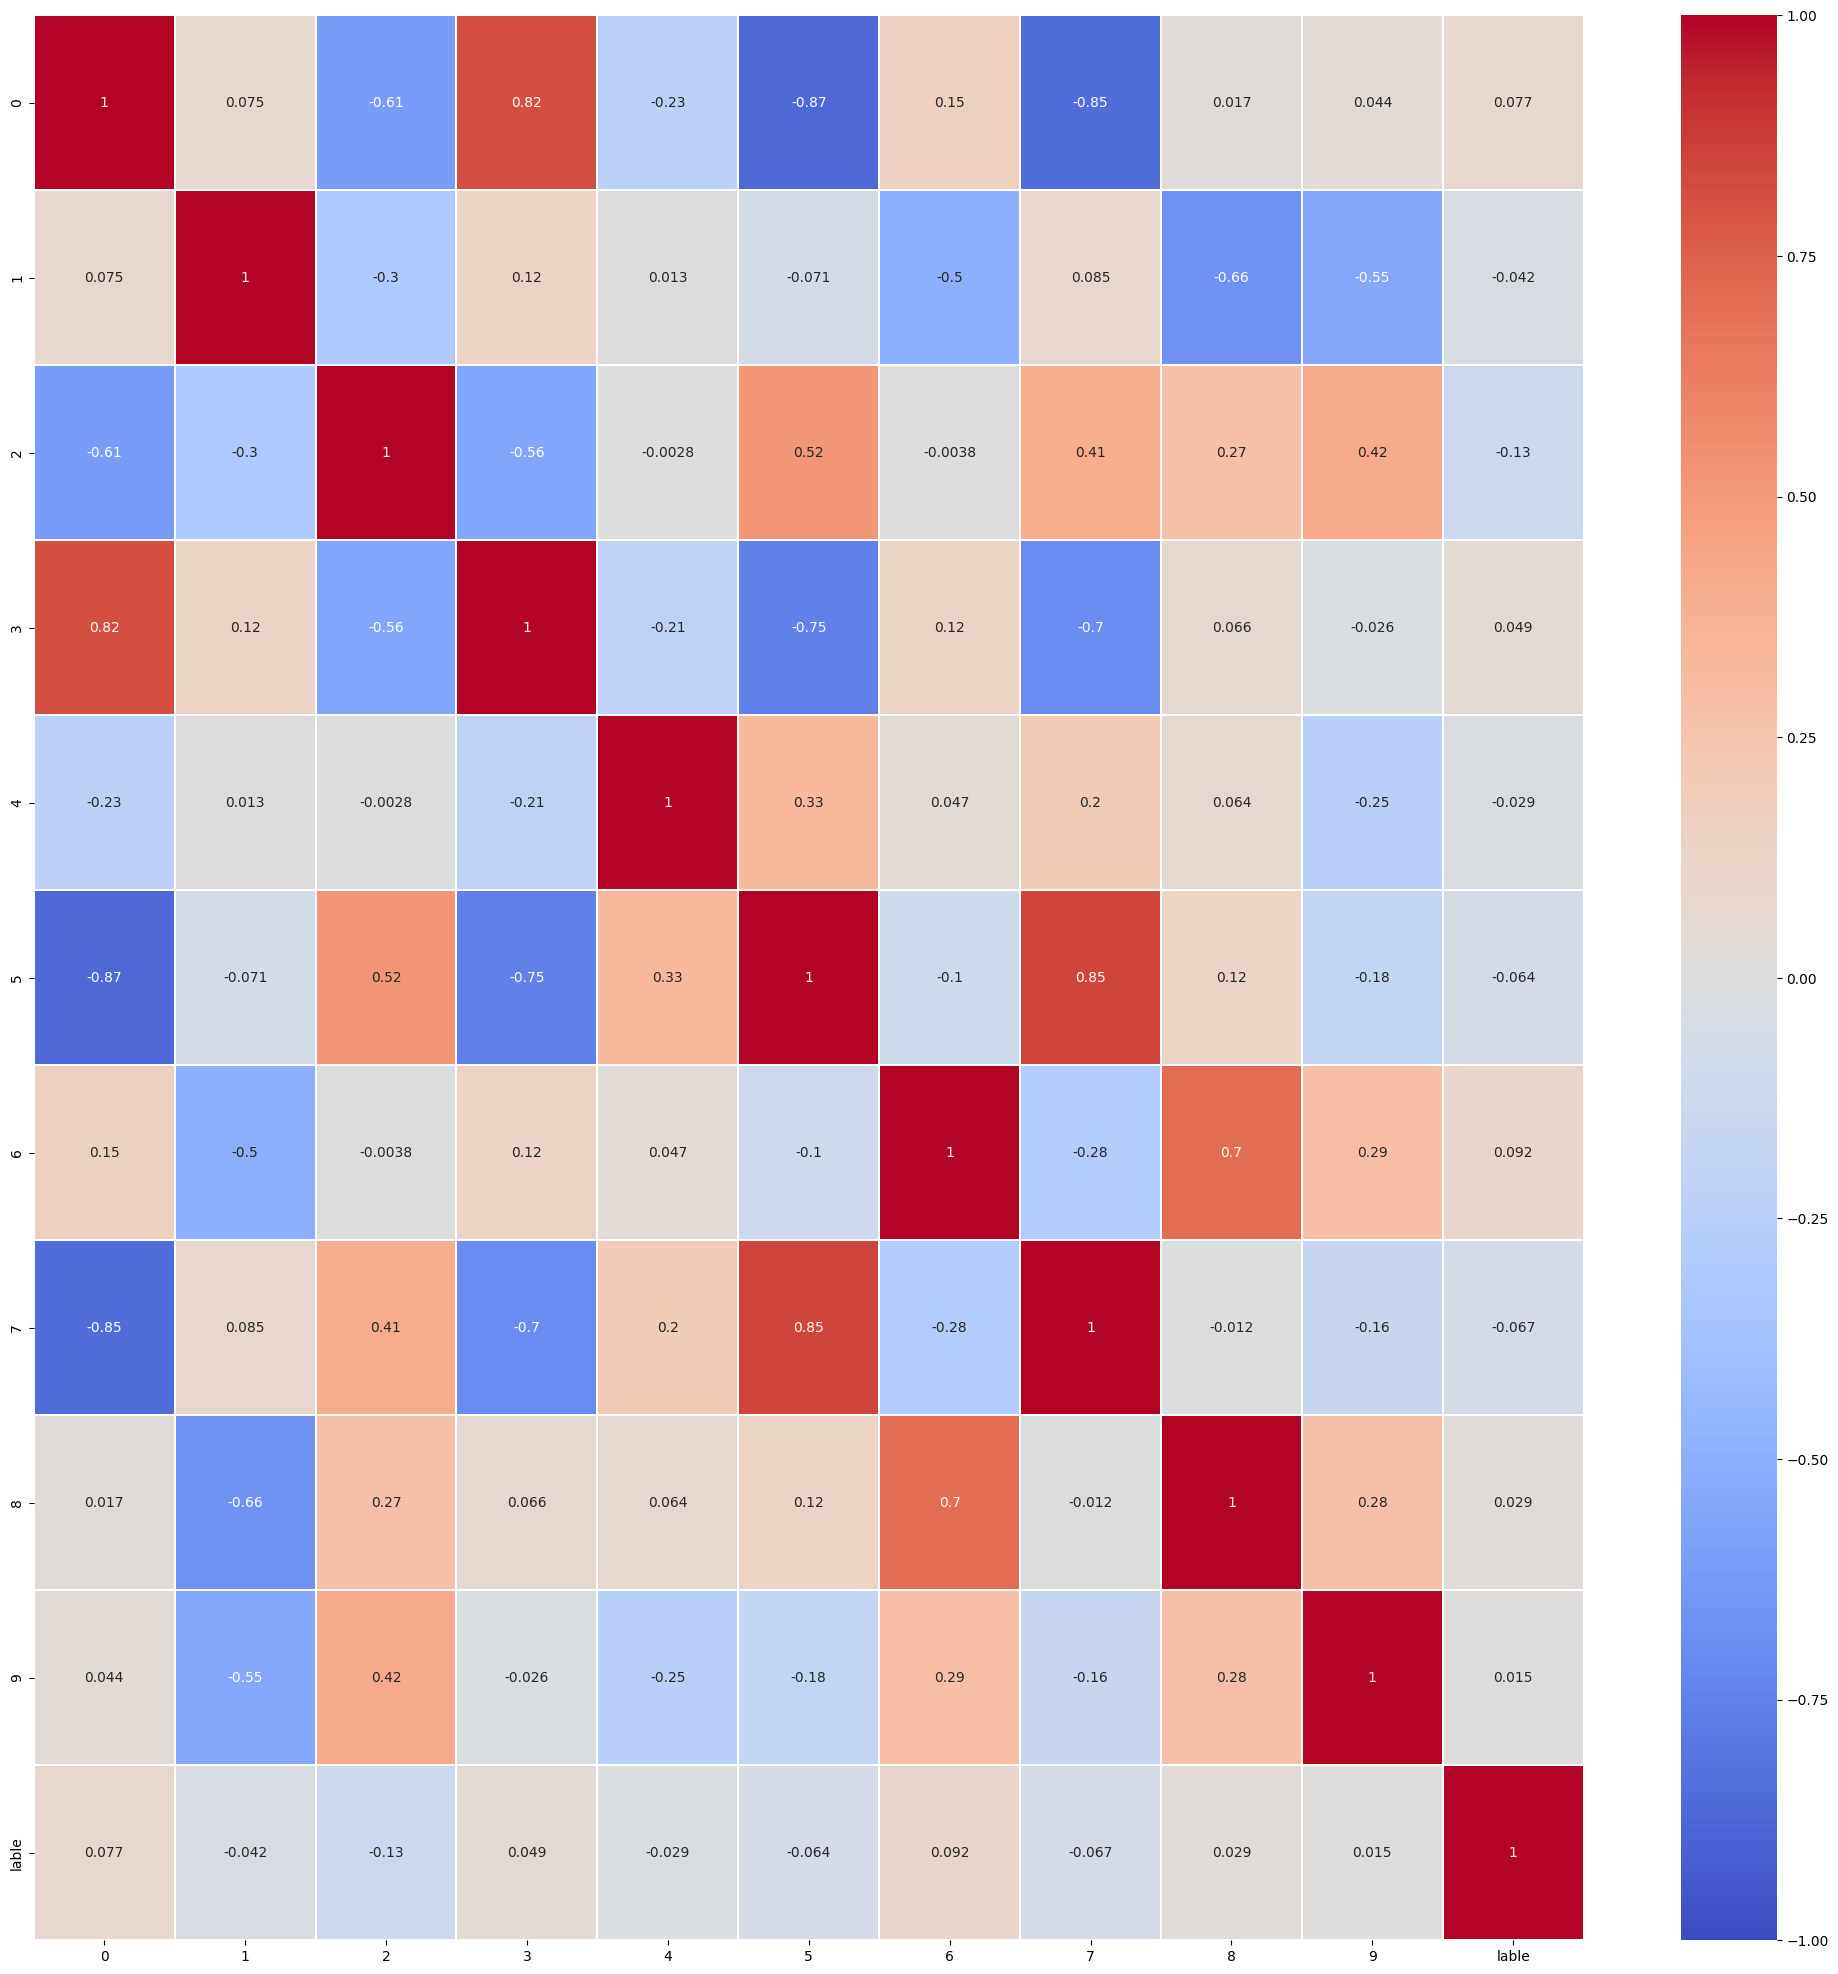

In [ ]:
plt.figure(figsize = (25  ,25))
sns.heatmap(
df2.corr(), vmin = -1, vmax = 1, annot = True, cmap = "coolwarm",linewidths=.3)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X1 = df2.iloc[: , :-1]
Y1 = df2.iloc[: , -1]


pd.Series(chi2(X1 , Y1)[1] , index = X1.columns ).sort_values( ascending = False )

9    0.935772
8    0.871818
4    0.866028
1    0.795202
3    0.737273
5    0.682758
7    0.680991
6    0.642453
0    0.640429
2    0.433897
dtype: float64

In [ ]:
X1 = X1.drop([0,2,6,7,5],axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X1 , Y1 , test_size = 0.25,random_state=42 )

X_train  , X_val ,y_train ,y_val = train_test_split(X_train , y_train ,random_state = 0 , test_size = 0.1 )  #keep 10 percent of our data for validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.naive_bayes import BernoulliNB
text_classifier = BernoulliNB()
text_classifier.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = text_classifier.predict(X_test)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
percision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("percision:", percision)
print("f1_score:", f1)
print("recall_score:",recall)

Accuracy: 0.768
percision: 0.768
f1_score: 0.8687782805429864
recall_score: 1.0


In [ ]:
# Train a classifier, such as Logistic Regression, using the TF-IDF transformed data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Make predictions on the test set and evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
percision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("percision:", percision)
print("f1_score:", f1)
print("recall_score:",recall)

Accuracy: 0.768
percision: 0.768
f1_score: 0.8687782805429864
recall_score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
percision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("percision:", percision)
print("f1_score:", f1)
print("recall_score:",recall)

Accuracy: 0.768
percision: 0.7723577235772358
f1_score: 0.8675799086757991
recall_score: 0.9895833333333334
